In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

#Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Dropout , BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger

import tensorflow as tf

import pickle

from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

Importing train , test and valdidation datasets

In [ ]:
train = datagen.flow_from_directory('/content/gdrive/My Drive/breast_cancer/train', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate validation dataset
val = datagen.flow_from_directory('/content/gdrive/My Drive/breast_cancer/val/', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate test dataset
test = datagen.flow_from_directory('/content/gdrive/My Drive/breast_cancer/test/', target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train)

In [ ]:
imgs.shape

(64, 224, 224, 3)

In [ ]:
train.class_indices

{'Benign': 0, 'Malignant': 1}

1.0


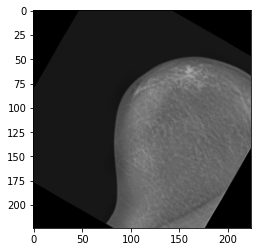

In [ ]:
plt.imshow(imgs[0])
print(labels[0])

*Creating* a CNN model 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

Defining step size of train and validation data 

In [ ]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

In [ ]:
csv_logger = CSVLogger('/content/gdrive/My Drive/breast_cancer/training.log', separator=',', append=False)

In [ ]:
history = model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=25,
                    callbacks=[csv_logger]) 
model.save('/content/gdrive/My Drive/first_model.h5')

<ipython-input-14-d1806329eacb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train,


Epoch 1/25
59/59 [==============================] - 1424s 24s/step - loss: 0.6722 - accuracy: 0.6551 - val_loss: 0.6308 - val_accuracy: 0.6719
Epoch 2/25
59/59 [==============================] - 23s 397ms/step - loss: 0.6422 - accuracy: 0.6692 - val_loss: 0.6355 - val_accuracy: 0.6719
Epoch 3/25
59/59 [==============================] - 18s 304ms/step - loss: 0.6410 - accuracy: 0.6698 - val_loss: 0.6401 - val_accuracy: 0.6708
Epoch 4/25
59/59 [==============================] - 24s 407ms/step - loss: 0.6367 - accuracy: 0.6700 - val_loss: 0.6327 - val_accuracy: 0.6708
Epoch 5/25
59/59 [==============================] - 18s 297ms/step - loss: 0.6357 - accuracy: 0.6703 - val_loss: 0.6285 - val_accuracy: 0.6703
Epoch 6/25
59/59 [==============================] - 23s 398ms/step - loss: 0.6266 - accuracy: 0.6682 - val_loss: 0.6247 - val_accuracy: 0.6708
Epoch 7/25
59/59 [==============================] - 18s 304ms/step - loss: 0.6099 - accuracy: 0.6700 - val_loss: 0.6164 - val_accuracy: 0.6767

In [ ]:
import pandas as pd
log_data = pd.read_csv('/content/gdrive/My Drive/breast_cancer/training.log', sep=',', engine='python')

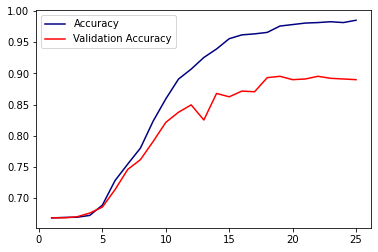

In [ ]:
plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

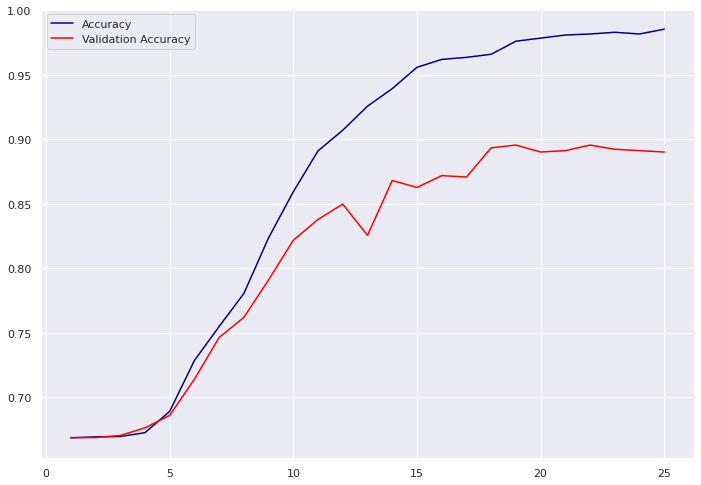

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

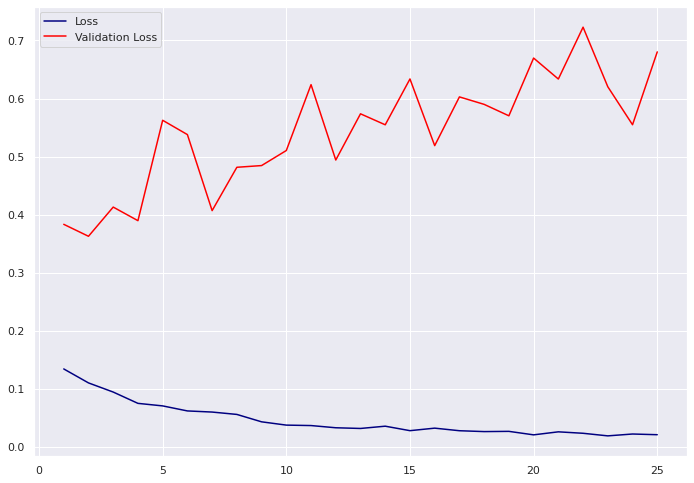

In [ ]:
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['val_loss'], color='red', label='Validation Loss')
plt.legend()

In [ ]:
from keras.models import load_model

restored_model = load_model('/content/gdrive/My Drive/first_model.h5')

Defining step size of test data 

In [ ]:
steps = test.n//test.batch_size

test.reset()
X_test, y_test = [] , []
for i in range(steps):
    a , b = test.next()
    X_test.extend(a) 
    y_test.extend(b)

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
pickle.dump(X_test, open('/content/gdrive/My Drive/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/gdrive/My Drive/y_test.pkl', 'wb'))


In [ ]:
X_test = pickle.load(open('/content/gdrive/My Drive/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/gdrive/My Drive/y_test.pkl', 'rb'))


In [ ]:
print(X_test.shape, y_test.shape)

(1856, 224, 224, 3) (1856,)


# Checking score of model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.5016220808029175 / Test accuracy: 0.8900862336158752


In [ ]:
score = restored_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.5016220808029175 / Test accuracy: 0.8900862336158752


In [ ]:
y_pred_prob = model.predict(X_test)

58/58 [==============================] - 2s 27ms/step


In [ ]:
# Using the saved model
y_pred_prob = restored_model.predict(X_test)

58/58 [==============================] - 1s 20ms/step


In [ ]:
y_pred_prob

array([[2.0459255e-04],
       [9.9575871e-01],
       [9.9996209e-01],
       ...,
       [9.9999905e-01],
       [2.3819307e-04],
       [9.4618994e-01]], dtype=float32)

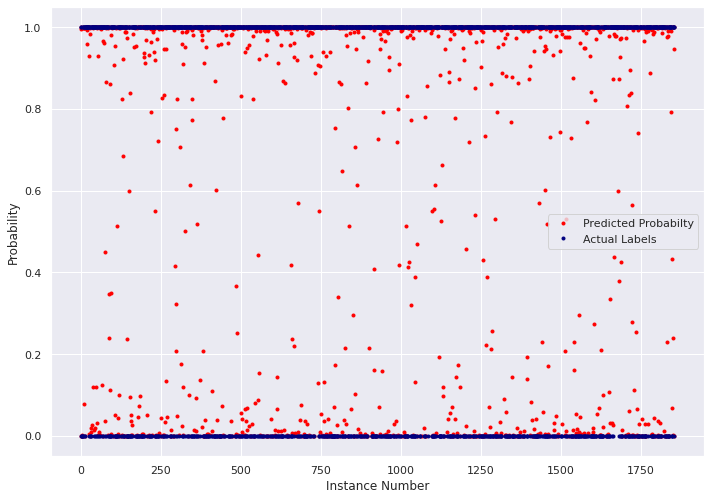

In [ ]:
plt.plot(y_pred_prob,'.',color='red',label='Predicted Probabilty')
plt.plot(y_test,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

In [ ]:
y_test

array([0., 1., 1., ..., 1., 0., 1.], dtype=float32)

In [ ]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([0, 1, 1, ..., 1, 0, 1])

Plotting confusion matrix

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

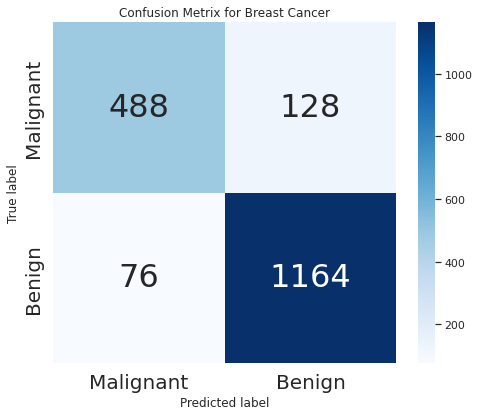

In [ ]:
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.87      0.79      0.83       616
Malignant (Class 1)       0.90      0.94      0.92      1240

           accuracy                           0.89      1856
          macro avg       0.88      0.87      0.87      1856
       weighted avg       0.89      0.89      0.89      1856



In [ ]:
from sklearn.metrics import roc_curve, auc

fpr , tpr , thresholds = roc_curve (y_test , y_pred_prob)

area_under_curve = auc(fpr, tpr)

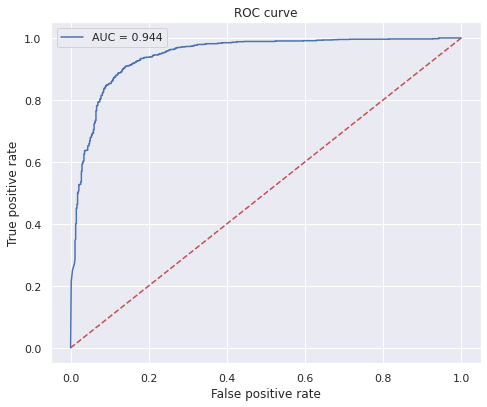

In [ ]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob, axis=1)
prediction_probs = np.max(y_pred_prob, axis=1)

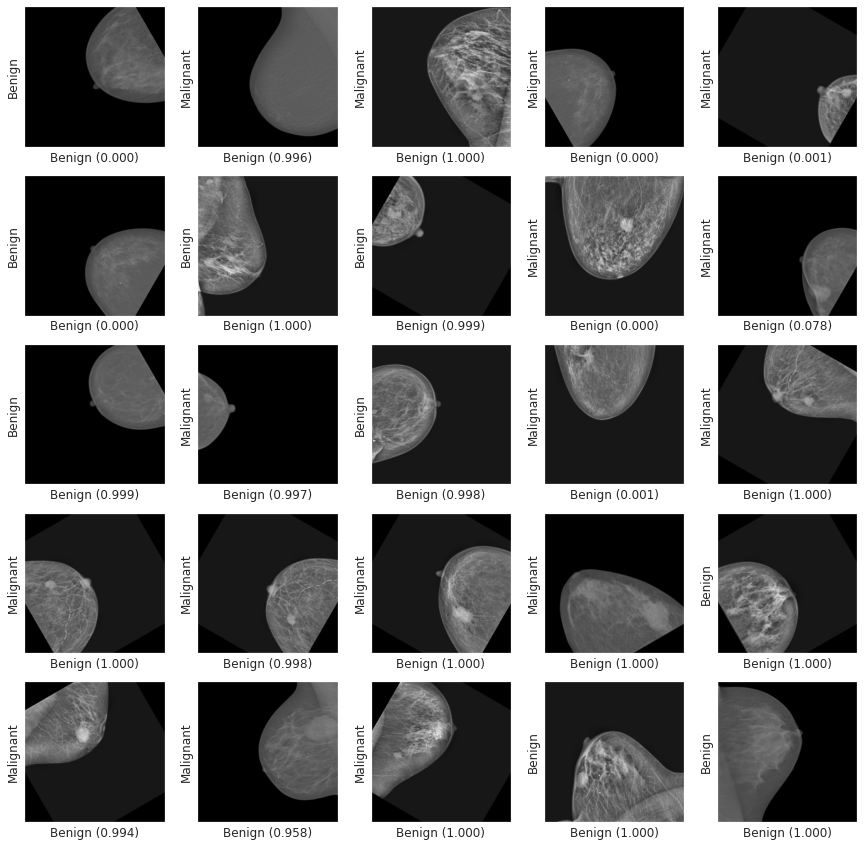

In [ ]:
plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))

In [ ]:
from keras.applications.vgg16 import VGG16

backbone = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
backbone.trainable = False

In [ ]:
VGG_model = Sequential()
VGG_model.add(backbone)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())
VGG_model.add(Dropout(0.5))
VGG_model.add(Dense(1, activation='sigmoid'))

In [ ]:
VGG_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )


In [ ]:
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                      

In [ ]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
#@title
history = VGG_model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model.save('/content/gdrive/My Drive/VGG_model.h5')

<ipython-input-46-e4d05c3820fe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = VGG_model.fit_generator(generator = train,


Epoch 1/10
59/59 [==============================] - 36s 500ms/step - loss: 0.7918 - accuracy: 0.5813 - val_loss: 0.7799 - val_accuracy: 0.3707
Epoch 2/10
59/59 [==============================] - 22s 378ms/step - loss: 0.5901 - accuracy: 0.7002 - val_loss: 0.7283 - val_accuracy: 0.4962
Epoch 3/10
59/59 [==============================] - 25s 422ms/step - loss: 0.5002 - accuracy: 0.7564 - val_loss: 0.6155 - val_accuracy: 0.6363
Epoch 4/10
59/59 [==============================] - 23s 383ms/step - loss: 0.4469 - accuracy: 0.7905 - val_loss: 0.5942 - val_accuracy: 0.6870
Epoch 5/10
59/59 [==============================] - 22s 374ms/step - loss: 0.3923 - accuracy: 0.8177 - val_loss: 0.5431 - val_accuracy: 0.7220
Epoch 6/10
59/59 [==============================] - 22s 377ms/step - loss: 0.3487 - accuracy: 0.8473 - val_loss: 0.4243 - val_accuracy: 0.8103
Epoch 7/10
59/59 [==============================] - 22s 378ms/step - loss: 0.3042 - accuracy: 0.8729 - val_loss: 0.3920 - val_accuracy: 0.8233

In [ ]:
VGG_model = load_model('/content/gdrive/My Drive/VGG_model.h5')

In [ ]:
score1 = VGG_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score1[0]} / Test accuracy: {score1[1]}')

Test loss: 0.3835194408893585 / Test accuracy: 0.8211206793785095


In [ ]:
y_pred_prob_2 = VGG_model.predict(X_test)

58/58 [==============================] - 7s 125ms/step


In [ ]:
threshold = 0.5
y_pred_2 = np.where(y_pred_prob_2 > threshold, 1,0)
y_pred_2.squeeze()

array([0, 0, 1, ..., 1, 0, 0])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

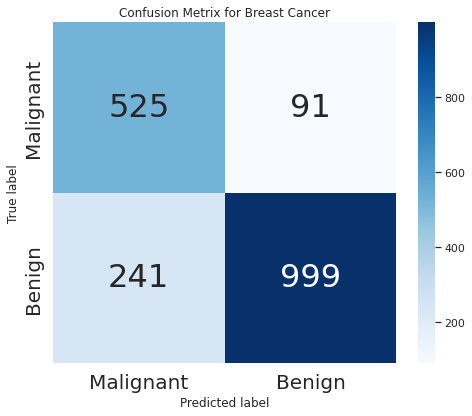

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_2),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_2, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.69      0.85      0.76       616
Malignant (Class 1)       0.92      0.81      0.86      1240

           accuracy                           0.82      1856
          macro avg       0.80      0.83      0.81      1856
       weighted avg       0.84      0.82      0.83      1856



## Fine Tuning

In [ ]:
backbone2 = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

In [ ]:
backbone2 = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

 # Unfreeze final 2 convolution blocks

In [ ]:
set_trainable = False
for layer in backbone2.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
VGG_model_2 = Sequential()
VGG_model_2.add(backbone2)
VGG_model_2.add(GlobalAveragePooling2D())
VGG_model_2.add(BatchNormalization())
VGG_model_2.add(Dropout(0.5))
VGG_model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
VGG_model_2.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )


In [ ]:
VGG_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,717,249
Trainable params: 12,980,737


In [ ]:
history = VGG_model_2.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model_2.save('/content/gdrive/My Drive/VGG_model_2.h5')

<ipython-input-59-7061b39ee505>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = VGG_model_2.fit_generator(generator = train,


Epoch 1/10
59/59 [==============================] - 36s 518ms/step - loss: 0.7069 - accuracy: 0.5448 - val_loss: 0.6260 - val_accuracy: 0.6713
Epoch 2/10
59/59 [==============================] - 29s 489ms/step - loss: 0.5704 - accuracy: 0.7159 - val_loss: 0.6905 - val_accuracy: 0.6692
Epoch 3/10
59/59 [==============================] - 29s 483ms/step - loss: 0.4423 - accuracy: 0.8025 - val_loss: 0.5162 - val_accuracy: 0.7155
Epoch 4/10
59/59 [==============================] - 32s 550ms/step - loss: 0.3221 - accuracy: 0.8617 - val_loss: 0.4122 - val_accuracy: 0.8103
Epoch 5/10
59/59 [==============================] - 29s 484ms/step - loss: 0.2235 - accuracy: 0.9176 - val_loss: 0.3177 - val_accuracy: 0.8475
Epoch 6/10
59/59 [==============================] - 29s 496ms/step - loss: 0.1701 - accuracy: 0.9318 - val_loss: 0.3039 - val_accuracy: 0.8605
Epoch 7/10
59/59 [==============================] - 32s 541ms/step - loss: 0.1416 - accuracy: 0.9496 - val_loss: 0.1856 - val_accuracy: 0.9159

In [ ]:
VGG_model_2 = load_model('/content/gdrive/My Drive/VGG_model_2.h5')

In [ ]:
score2 = VGG_model_2.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

Test loss: 0.38963696360588074 / Test accuracy: 0.8302801847457886


In [ ]:
y_pred_prob_3 = VGG_model_2.predict(X_test)

58/58 [==============================] - 7s 119ms/step


In [ ]:
threshold = 0.5
y_pred_3 = np.where(y_pred_prob_3 > threshold, 1,0)
y_pred_3.squeeze()

array([1, 1, 1, ..., 1, 0, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

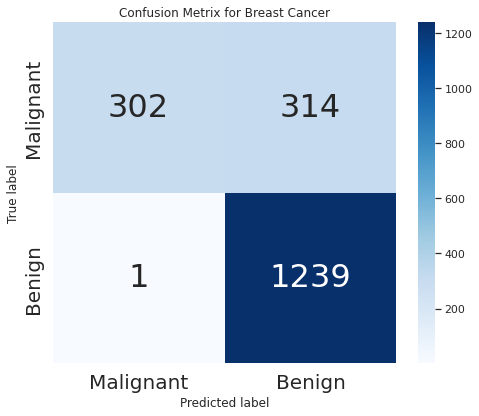

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_3),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_3, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       1.00      0.49      0.66       616
Malignant (Class 1)       0.80      1.00      0.89      1240

           accuracy                           0.83      1856
          macro avg       0.90      0.74      0.77      1856
       weighted avg       0.86      0.83      0.81      1856



# Transfer Learning using ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
backbone3 = ResNet50(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
backbone3.training = False

In [ ]:
ResNet50_model = Sequential()
ResNet50_model.add(backbone3)
ResNet50_model.add(GlobalAveragePooling2D())
ResNet50_model.add(Dropout(0.5))
ResNet50_model.add(Dense(1, activation='sigmoid'))

In [ ]:
ResNet50_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
ResNet50_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
history = ResNet50_model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
ResNet50_model.save('/content/gdrive/My Drive/ResNet50_model.h5')

<ipython-input-73-f6a2742cfbfb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = ResNet50_model.fit_generator(generator = train,


Epoch 1/10
59/59 [==============================] - 46s 783ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.7359 - val_accuracy: 0.5690
Epoch 2/10
59/59 [==============================] - 45s 759ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.7682 - val_accuracy: 0.6223
Epoch 3/10
59/59 [==============================] - 49s 827ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.8809 - val_accuracy: 0.6633
Epoch 4/10
59/59 [==============================] - 49s 826ms/step - loss: 0.0115 - accuracy: 0.9971 - val_loss: 1.2094 - val_accuracy: 0.6746
Epoch 5/10
59/59 [==============================] - 49s 828ms/step - loss: 0.0165 - accuracy: 0.9952 - val_loss: 1.1362 - val_accuracy: 0.6789
Epoch 6/10
59/59 [==============================] - 48s 820ms/step - loss: 0.0132 - accuracy: 0.9968 - val_loss: 1.0004 - val_accuracy: 0.7241
Epoch 7/10
59/59 [==============================] - 49s 830ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 1.3037 - val_accuracy: 0.7268

In [ ]:
ResNet50_model = load_model('/content/gdrive/My Drive/ResNet50_model.h5')

In [ ]:
score3 = ResNet50_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score3[0]} / Test accuracy: {score3[1]}')

Test loss: 1.1811143159866333 / Test accuracy: 0.735991358757019


In [ ]:
y_pred_prob_4 = ResNet50_model.predict(X_test)

58/58 [==============================] - 6s 94ms/step


In [ ]:
threshold = 0.5
y_pred_4 = np.where(y_pred_prob_4 > threshold, 1,0)
y_pred_4.squeeze()

array([1, 1, 1, ..., 1, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

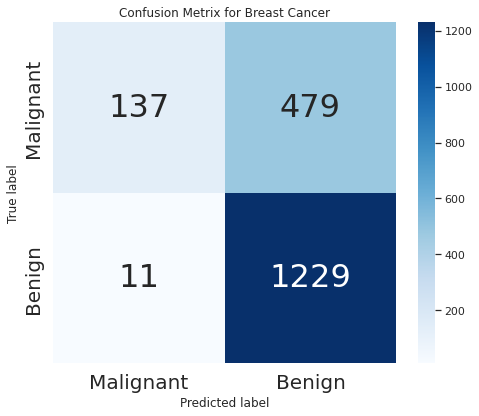

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_4),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_4, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.93      0.22      0.36       616
Malignant (Class 1)       0.72      0.99      0.83      1240

           accuracy                           0.74      1856
          macro avg       0.82      0.61      0.60      1856
       weighted avg       0.79      0.74      0.68      1856

